In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/new_dataset.csv')

In [ ]:
new_df=df.dropna(axis=0, how='any')

In [ ]:
new_df

,ccode_x,year,milex,milper,irst,pec,tpop,upop,cinc,ccode_y,statename,imports,exports,AtWar
0,2,1870,13128,50,1692,37779,39905,4130,0.099000,2,170,450.000000,418.000000,0
1,2,1871,11811,42,1735,39546,40938,4302,0.098381,2,170,534.000000,475.000000,0
2,2,1872,14246,42,2590,48479,41972,4481,0.115283,2,170,632.000000,474.000000,0
3,2,1873,15014,43,2602,53674,43006,4667,0.116269,2,170,342.029999,626.590027,0
4,2,1874,12899,44,2439,51736,44040,4862,0.114245,2,170,576.000000,619.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,990,2008,0,0,0,39,183,0,0.000005,990,133,374.716258,153.254112,0
12236,990,2009,0,0,0,38,185,0,0.000005,990,133,340.987174,120.319739,0
12237,990,2010,0,0,0,38,186,0,0.000005,990,133,461.134529,134.037925,0
12238,990,2011,0,0,0,38,187,0,0.000005,990,133,493.031345,138.232471,0


In [ ]:
x = new_df.drop('AtWar', axis=1)
y = new_df.AtWar

In [ ]:
x

,ccode_x,year,milex,milper,irst,pec,tpop,upop,cinc,ccode_y,statename,imports,exports
0,2,1870,13128,50,1692,37779,39905,4130,0.099000,2,170,450.000000,418.000000
1,2,1871,11811,42,1735,39546,40938,4302,0.098381,2,170,534.000000,475.000000
2,2,1872,14246,42,2590,48479,41972,4481,0.115283,2,170,632.000000,474.000000
3,2,1873,15014,43,2602,53674,43006,4667,0.116269,2,170,342.029999,626.590027
4,2,1874,12899,44,2439,51736,44040,4862,0.114245,2,170,576.000000,619.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,990,2008,0,0,0,39,183,0,0.000005,990,133,374.716258,153.254112
12236,990,2009,0,0,0,38,185,0,0.000005,990,133,340.987174,120.319739
12237,990,2010,0,0,0,38,186,0,0.000005,990,133,461.134529,134.037925
12238,990,2011,0,0,0,38,187,0,0.000005,990,133,493.031345,138.232471


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12235    0
12236    0
12237    0
12238    0
12239    0
Name: AtWar, Length: 12239, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [ ]:
logistic_regression = LogisticRegression(max_iter=500)

In [ ]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logistic_regression.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

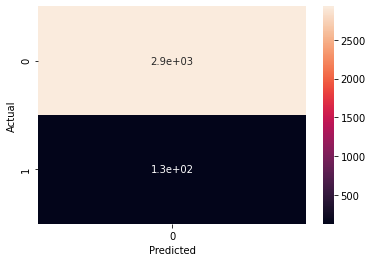

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9581699346405229


In [ ]:
y_test 

9545     0
5102     0
3344     0
4827     0
5946     0
        ..
9794     0
5645     1
2483     0
10403    0
11975    0
Name: AtWar, Length: 3060, dtype: int64

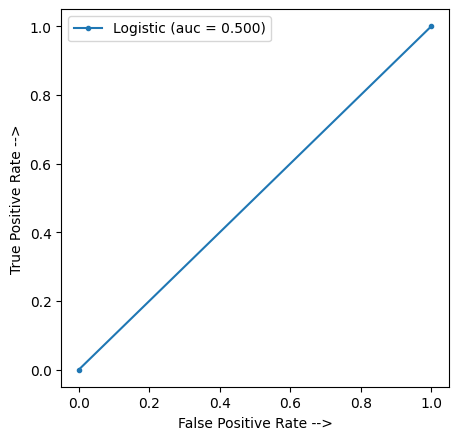

In [ ]:
from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(nn_fpr, nn_tpr, linestyle='-', label='NN (auc = %0.3f)' % auc_nn)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()